#### Importing Libraries for Analysis

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')


#### Read the data

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Loan_Predication.csv to Loan_Predication.csv


In [ ]:
data = pd.read_csv('Loan_Predication.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Determine Categorical Variables and Numerical Variables

In [ ]:
# Credit History is showing as integer data type, so we have to covert it to object to have accurate categorization.
data['Credit_History'] = data['Credit_History'].astype(object) 

# Filter out categorical variables and numerical variables.
categorical_var = list(set(data.dtypes[data.dtypes == object].index) - set(['Loan_Status']))
numeric_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
# Creates an empty list for categorical variables with zero variation
zero_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(data[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        # append it to the list of categorical variables with zero variation
        
data = data.drop(zero_cardinality, axis = 1) # drops variables with 0 variance

In [ ]:
# Creates a list of categorical variables with high cardinality
high_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(data[i].value_counts().index) >200: # check how many levels it has and if it is more
        high_cardinality.append(i) # than 200, variable has many levels
        # so append it to the list of categorical variables with high cardinality
        
print(high_cardinality) # Prints the list of variables with high cardinality

['Loan_ID']


In [ ]:
# Drops variables with high cardinality
data = data.drop(high_cardinality, axis = 1)
categorical_var = list(set(data.dtypes[data.dtypes == object].index) - set(['Loan_Status']))

**Missing Value Handling**

In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Fills in the missing values in numerical columns with median
# and overwrites the result into the existing dataset
for col in numeric_var:
    data[col].fillna(value = data[col].median(), inplace = True)

In [ ]:
# Fills in the missing values in numerical columns with mode
# and overwrites the result into the existing dataset
for col in categorical_var:
    data[col].fillna(data[col].mode()[0], inplace = True)

In [ ]:
# Check if any remaining missing values
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Univariate Analysis

1. Numerical Variables Univariate Analysis

In [ ]:
# Descriptive Statistics for numerical variables
data[numeric_var].describe().round(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.0,614.0,614.0,614.0
mean,5403.5,1621.2,145.8,342.4
std,6109.0,2926.2,84.1,64.4
min,150.0,0.0,9.0,12.0
25%,2877.5,0.0,100.2,360.0
50%,3812.5,1188.5,128.0,360.0
75%,5795.0,2297.2,164.8,360.0
max,81000.0,41667.0,700.0,480.0


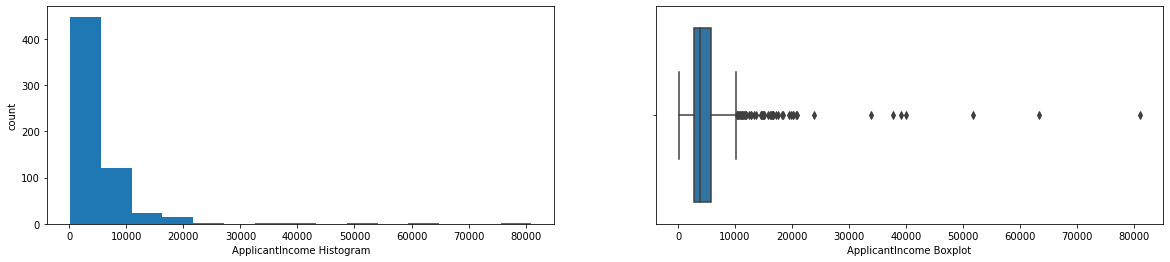

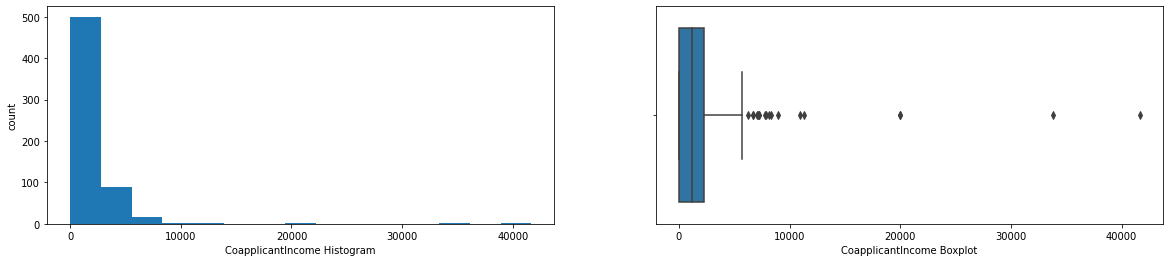

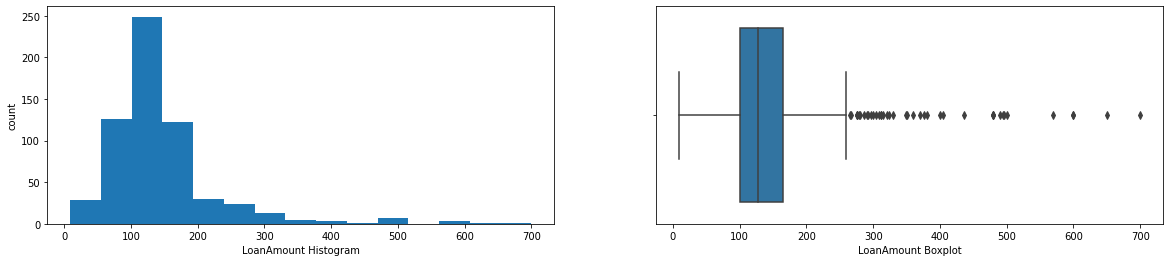

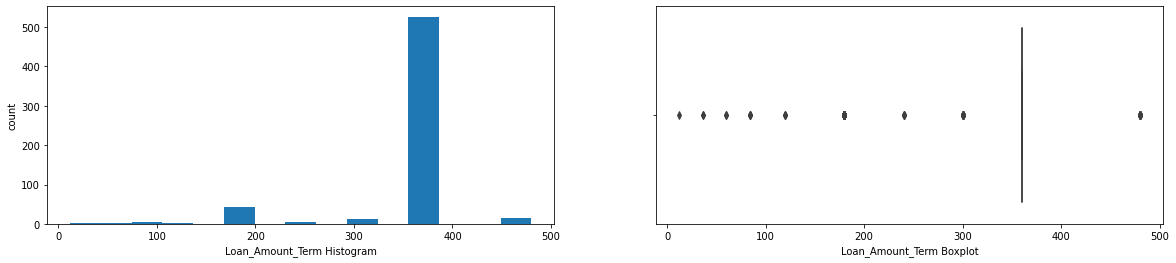

In [ ]:
# Plotting distribution charts for numerical variables
for i in numeric_var:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    data[i].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.xlabel(str(i) + ' Histogram')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[i])
    plt.xlabel(str(i) + ' Boxplot')

2. Categorical Variables Univariate Analysis

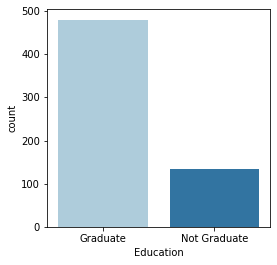

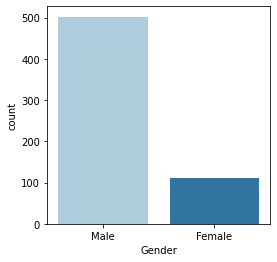

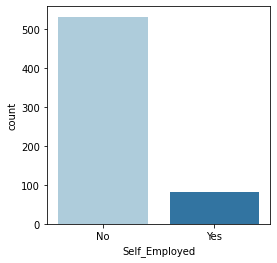

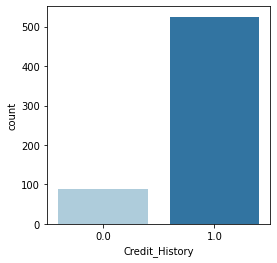

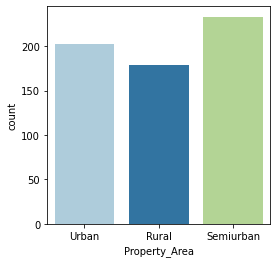

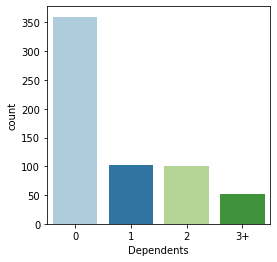

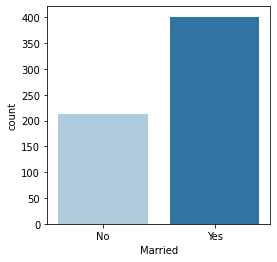

In [ ]:
# independent categorical variables countplots
for i in categorical_var:
    plt.figure(figsize=(4,4))
    sns.set_palette("Paired")
    sns.countplot(x = i, data = data)
    plt.ylabel('count')

#### Encoding and Analysing target variable 

In [ ]:
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True) # label encoding

In [ ]:
data['Loan_Status'].unique() # check encoding result

array([1, 0])

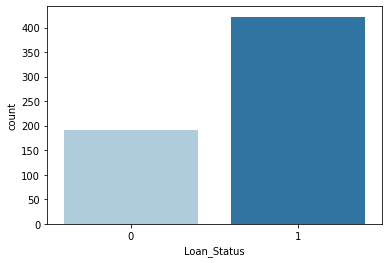

In [ ]:
ax = sns.countplot(data['Loan_Status']) # check the distribution of the output variable

There seems to be a case of oversampling with our target variable.

#### Bivariate Analysis

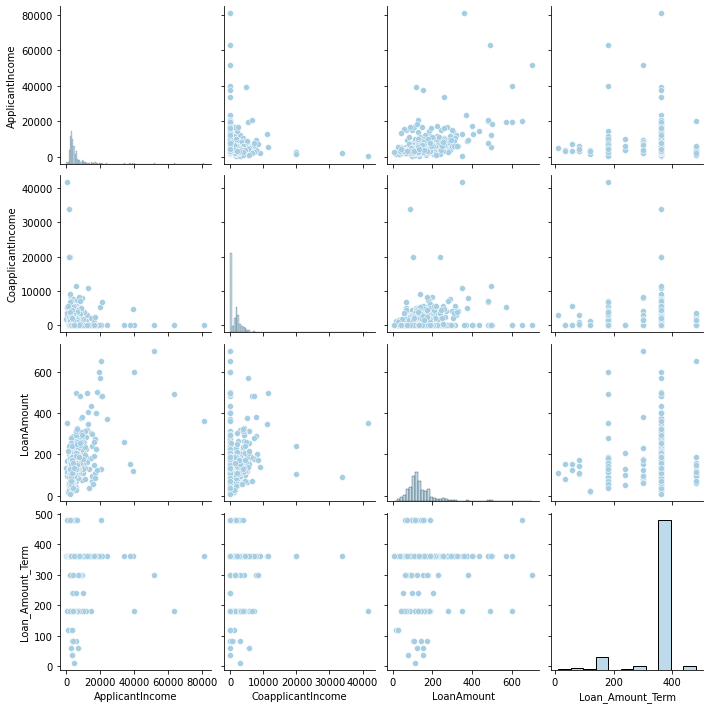

In [ ]:
# scatterplot to see the distributions of the variables and 
# how they are correlated to ther variables

ax = sns.pairplot(data[numeric_var], size = 2.5) # scatter plots

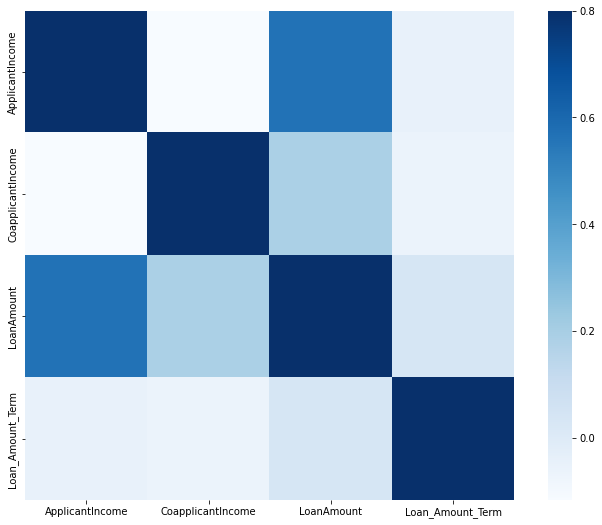

In [ ]:
# computes the person correlation among variables
corrmat = data[numeric_var].corr() 

# plots a correlation plot
f, ax = plt.subplots(figsize=(12, 9)) # determines the figure size
ax = sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues") # creates a heatmap using the correlation matrix

#### Creating dummy variables using onehot encoding

In [ ]:
# Create dummy variables using onehot encoding
dummy = pd.get_dummies(data[categorical_var], drop_first=True) 

In [ ]:
# Drops categorical variables from the df
data = data.drop(categorical_var, axis = 1) 

# Adds the newly created dummy variables instead
data = pd.concat([data, dummy], axis = 1) 

#### Fixing outsample in dependent variable

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) # using the smote technique 
# (somehow oversampling) to balance the data

input_var = list(set(data.columns) - set(['Loan_Status'])) # sets the input var

X, Y = os.fit_resample(data[data.columns.difference(['Loan_Status'])], data['Loan_Status']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # makes the X array as a dataframe
Y = pd.DataFrame(Y, columns = ['Loan_Status']) # makes the Y array as a dataframe

data = pd.concat([X, Y], axis=1) # Combine X and Y

In [ ]:
data['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

#### Standardize the data

In [ ]:
# your code to standardize numerical variables goes in here
# import Standard Scaler 
from sklearn.preprocessing import StandardScaler

# re-identify numerical variables
numeric_var = list(set(data.dtypes[data.dtypes != object].index)) 

# set standardization instance
data_scaler = StandardScaler().fit(data[numeric_var])

# standardize and replace value in the original dataframe
data[numeric_var] = pd.DataFrame(data_scaler.transform(data[numeric_var]),columns = numeric_var)

#### Fitting Logistic Regression, Random Forest Classifier, and KNN

In [ ]:
X = data.drop('Loan_Status', axis = 1)
Y = data['Loan_Status']

In [ ]:
#Splitting the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

#### Model Assessment

In [ ]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [ ]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [ ]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['Specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf.round(3)

,Accuracy,Sensitivity,Specificity
Logistic Regression,0.799,0.709,0.892
Decision Trees,0.740,0.663,0.819
Random Forest,0.793,0.628,0.964
K-NN,0.751,0.663,0.843


#### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

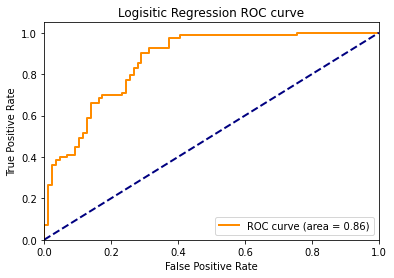

In [ ]:
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logisitic Regression ROC curve')
plt.legend(loc="lower right")
plt.show()

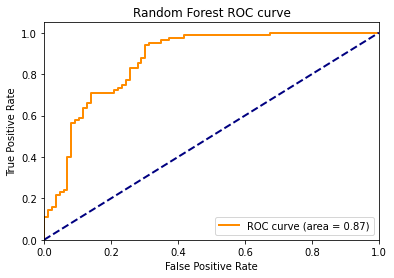

In [ ]:
score_Y_rf = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_rf[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend(loc="lower right")
plt.show()

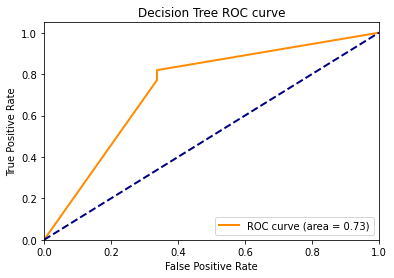

In [ ]:
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc="lower right")
plt.show()

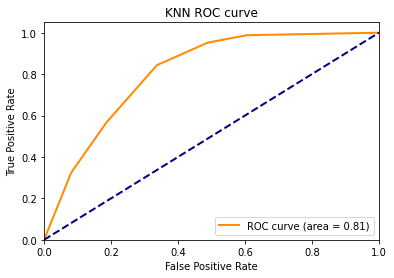

In [ ]:
score_Y_knn = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_knn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.legend(loc="lower right")
plt.show()

Parameters Tuning

In [103]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [104]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=21)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=21)

In [105]:
# Random Forests
rf = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, random_state=0)

In [106]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [107]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [108]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

# accuracy, sensitivity, aand specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [109]:
perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['Specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf.round(3)

,Accuracy,Sensitivity,Specificity
Logistic Regression,0.799,0.709,0.892
Decision Trees,0.769,0.709,0.831
Random Forest,0.828,0.733,0.928
K-NN,0.751,0.663,0.843


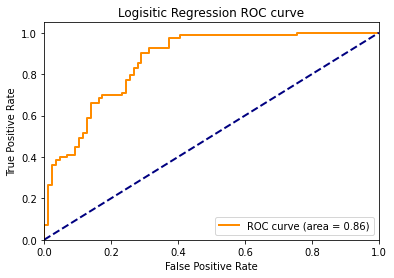

In [110]:
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logisitic Regression ROC curve')
plt.legend(loc="lower right")
plt.show()

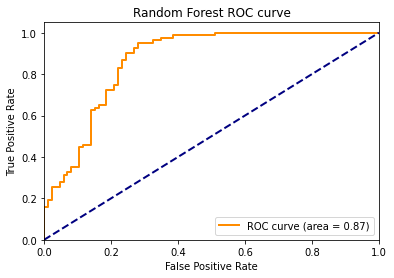

In [111]:
score_Y_rf = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_rf[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend(loc="lower right")
plt.show()

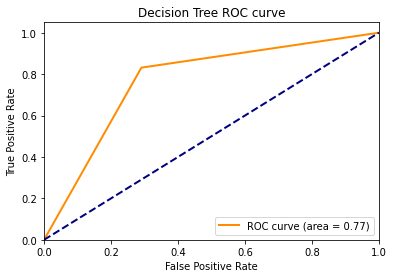

In [112]:
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc="lower right")
plt.show()

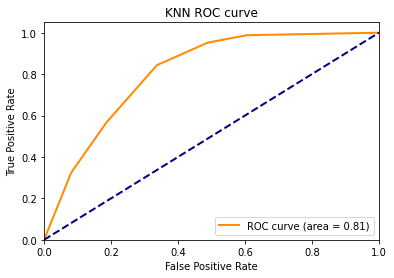

In [113]:
score_Y_knn = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_knn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.legend(loc="lower right")
plt.show()